<a href="https://colab.research.google.com/github/Paavani-git/Machine_Learning/blob/main/Pavani_Labsheet_6(19041).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Labsheet 6- Perceptron

##Background
We know that discriminant function/decision surface is used to separate 2 classes.Till now we crossed linear discriminant functions for separation.
Let us consider blue colour bubbles as class ${\omega_1}$, green colour bubbles as class ${\omega_2}$  \ref{fig1}.
In the first case, a person or a system can separate classes easily using any linear function. In the second case, a system can't create a linear discriminant function for separating both groups.

**Voltage and current**

$I=\sum_{i=1}^{n} V_{i}G_{i} +I_{o} $

Where,

V${_i}$ = The voltage coming from the ith neuron

$G{_i}$ =The  conductivity of the synaptic junction between the ith neuron and the neuron of interest

$I{_0}$ = The dark current

The output voltage is then computed from (I) 

**Rosenblatt's Perceptron**
The idea of this model was to incorporate the Voltage and Current Equations of a Neuron.

Let us consider, The terms $x{_1}$, to $x{_n}$, can be viewed as the inputs coming from n adjacent neurons and the terms $w{_1}$, to $w{_n}$ are the corresponding conductance values at each synapse junction.

.In machine learning perspective, we have a feature vector \textbf{x} that is n dimensional,that is given as $x{_1}$,$x{_2}$,......$x{_n}$.

$$ a=\sum_{i=1}^{n} x_{i}w_{i} +x_{0}*w_{0}$$
y=$\sigma(a) $

where $\sigma$ is a non linear function and\textbf{ a non linear function called activation function.

**Activation function**   
**Steepest descent algorithm** It is an iterative method for finding ${\omega_i}$ values.Take some initial value of weights, compute the gradient with respect to the weight and then make modifications to the weight value with respect to the gradient value. 
$${w_i}(t+1)$ = ${w_i}(t) - 2η {\frac{\partial E}{\partial{w{_i}}}}$$
where,

$\space\space$
t corresponds to the iteration number\newline
$\space\space$ 
$\eta$ is the learning rate/ step size \newline
The algorithm converges when the change in the weight value is less than a threshold or the number of iterations reaches a maximum threshold 

**Learning rate**

The choice of learning rate is paramount for the algorithm to reach a minima. 
If we choose a very small value of learning rate, the algorithm requires large number of iterations to reach the minimum.

Weight updation 

$${w_i(t+1) = w_i(t)+ \frac{2 \eta}{N}{\sum_{j=1}^n}{e_j}{\hat{y_j}}(1-\hat{y_j}){x_j}(i){|_{w_i = w_i(t)}}}$$

**Steps:**
1. Calculate $\hat {y_j} $
2. Compute error ej
3. Modify the weights and update **t**



## Question
Learn the decision plane for a Perceptron for the following classification problem.
The training data comprising of feature vector belonging to 2 classes and the corresponding labels are given in the file ***trainingdata.mat*** and ***labels.mat*** respectively. If you plot the data, you will get a figure of the type shown below. 

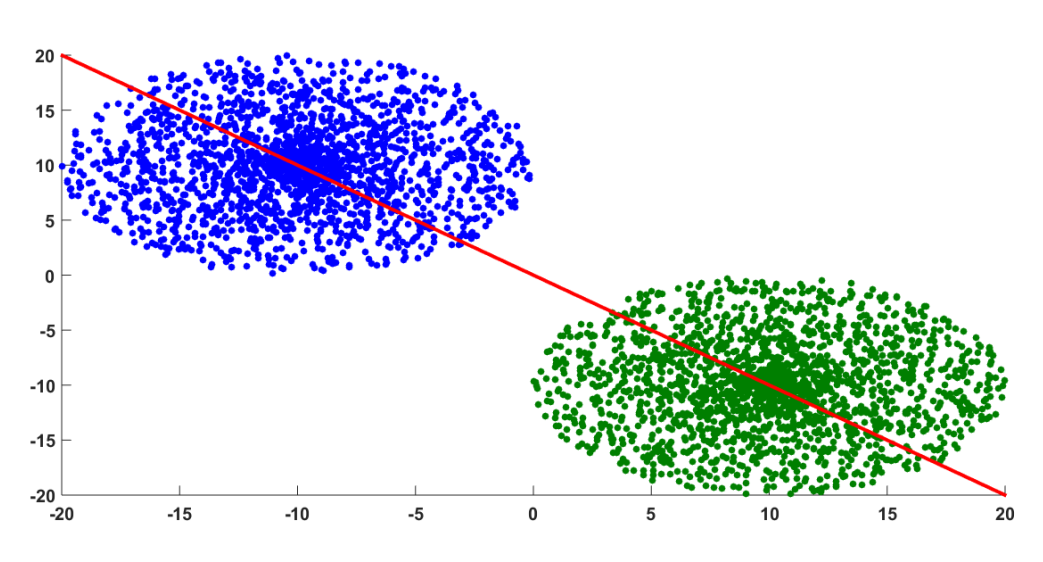






To begin with, consider the red line passing through the points (-10,10) and (10,-10) as the initial decision boundary of the perceptron ($y=-x$ (In other words $w_0=0, w_1=1$ and $w_2=1$)). Try to update the weights of the perceptron using gradient descent algorithm and plot how the decision boundary changes after each iteration. For this case, consider the learning rate to be 0.3.



*   Plot the final decision boundary ($y=-\frac{w_1}{w_2}x-\frac{w_0}{w_2}$) along with the training data for varying number of iterations. Take values of 10,50,100, and 150.
*   Vary the learning rate and show how the algorithm converges for different rate. Take values of $, 1 \times 10^{−2}, 1 \times 10^{−1}$, and $1$.Consider the same initial decision boundary to begin with.
*  Another way to check for convergence is to check if the total misclassification error ($E=\frac{1}{N}\sum_\limits{j=1}^N (y_j-\hat{y}_j)^2$) is less than a preset threshold $\epsilon$. Vary the $\epsilon$ values and display the number of iterations required for convergence. Take values of $2 \times 10^{−4}$, $1 \times 10^{−3}$, $1 \times 10^{−2}$. Assume the same initial decision boundary as previous parts with learning rate of 0.3. Also display the final decision boundary for each case of $\epsilon$

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy.io import *
import numpy as np
import matplotlib.pyplot as plt
training_data = loadmat('/content/drive/MyDrive/training_data.mat')
training_data= np.array(training_data['pop'])
label = loadmat('/content/drive/MyDrive/labels.mat')
y = np.array(label['y1'])

In [ ]:
def calc_ej (x,w,y):
  y1 = []
  ej = []
  for i in range (len(x)):
    a = w[0] + x[i][0]*w[1] + x[i][1]*w[2]
    t = 1 / (1 + np.exp(-a))
    y1.append(t)
    ej.append(y[0][i]-t)
  y1, ej = np.array(y1),np.array(ej)
  return y1, ej
w = np.array([0,1,1])
y1,ej = calc_ej (training_data,w,y)
print(y1,ej)

[0.99971055 0.99988681 0.78207878 ... 0.99052097 0.81630433 0.99994891] [-0.00971055 -0.00988681  0.20792122 ... -0.98052097 -0.80630433
 -0.98994891]


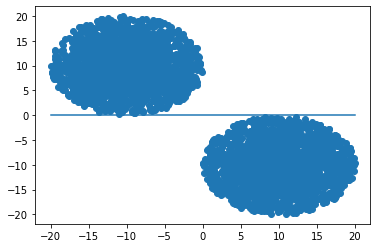

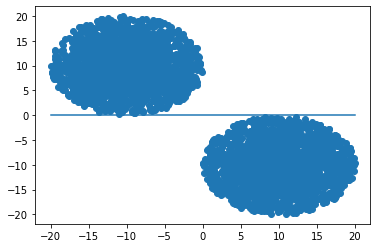

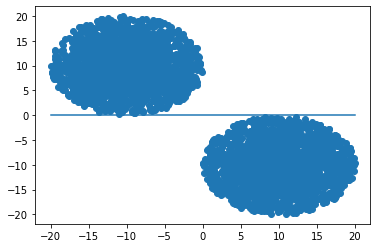

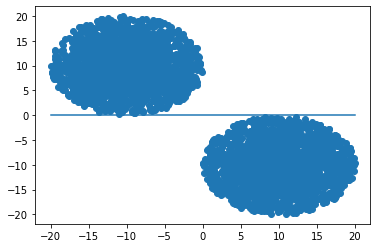

In [ ]:

learning_rate = 0.3
def steepest_algo (w,n_iter):
  for i in range (n_iter):
    for j in range (3):
      s = 0
      for k in range (len(training_data)):
        if (j==0):
          s = s + (ej[k] * y1[k] * (1 - y1[k]))
        else:
          s = s + (ej[k] * y1[k] * (1 - y1[k]) * training_data[k][j-1])
      w[j] = w[j] + ((2 * learning_rate)/len(training_data)) * s
  return w



w_10 = steepest_algo(w,10)
w_50 = steepest_algo(w,50)
w_100 = steepest_algo(w,100)
w_150 = steepest_algo(w,150)


w_total = [w_10,w_50,w_100,w_150]
for i in range(len(w_total)):
  x = np.linspace(-20,20,100)
  ws = w_total[i]
  y11 = -(ws[1]/ws[2])*x - (ws[0]/ws[2])
  plt.figure()
  plt.scatter(training_data[:,0],training_data[:,1])
  plt.plot(x,y11)



# Inference
Here two classes are seperating by a line at y=0.

# Reference

Perceptorn lecture notes and slides